In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

$$\textbf  {u}={\textbf  {f}}(x,{\textbf  {u}}),\quad {\textbf  {u}}(x_{0})={\textbf  {u}}_{0}$$
$$ \textbf{u}_{n+1} = \textbf{u}_n + h\sum_{i=1}^s b_i \textbf{k}_i$$
где h — величина шага сетки по x и вычисление нового значения проходит в s этапов:
$$\displaystyle {\begin{array}{ll}{\textbf {k}}_{1}={\textbf {f}}(x_{n},{\textbf {u}}_{n}),\\{\textbf {k}}_{2}={\textbf {f}}(x_{n}+c_{2}h,{\textbf {u}}_{n}+a_{21}h{\textbf {k}}_{1}),\\\cdots\\{\textbf {k}}_{s}={\textbf {f}}(x_{n}+c_{s}h,{\textbf {u}}_{n}+a_{s1}h{\textbf {k}}_{1}+a_{s2}h{\textbf {k}}_{2}+\cdots +a_{s,s-1}h{\textbf {k}}_{s-1})\end{array}}$$
                                       Общий вид  Таблицы Бутчера:
$$\begin{array}{c|ccccc}0&&&&&\\c_{2}&a_{{21}}&&&&\\c_{3}&a_{{31}}&a_{{32}}&&&\\\vdots &\vdots &\vdots &\ddots &&\\c_{s}&a_{{s1}}&a_{{s2}}&\dots &a_{{ss-1}}&\\\hline &b_{1}&b_{2}&\dots &b_{{s-1}}&b_{s}\end{array}$$ 

В моем случае таблица Бутчера для метода Р-К 3-его порядка имеет вид:
                                       $$\begin{array}{c|ccccc}0&&&&&\\\frac{1}{2}&\frac{1}{2}&&&&\\1&-1&1&&&&&&\\\hline &\frac{1}{6}&\frac{2}{3}&\frac{1}{6}\end{array}$$
                                       
                                       

In [47]:
class ODESolver:
    def __init__(self, a, b, c, f, u_0, u, bounds, h):
        self.a = a
        self.b = b
        self.c = c
        self.f = f
        self.u_0 = u_0
        self.u = u
        self.s = len(self.c)
        self.lb = bounds[0]
        self.rb = bounds[1]
        self.h = h
        self.x = []
        self.x = np.arange(bounds[0], bounds[1]+self.h,self.h)
        self.pts_number = len(self.x)
        self.u_n = np.zeros(self.pts_number)
        self.u_n[0] = self.u_0
        
        # Make the list of k-functions
        k1 = lambda x, y, myh: self.f(x, y)
        k2 = lambda x, y, myh: self.f(x + (self.c[1] * myh), y + (self.a[1][0] * myh * k1(x, y, myh)))
        k3 = lambda x, y, myh: self.f(x + (self.c[2] * myh), y + (self.a[2][0] * myh * k1(x, y, myh)) \
                                    + (self.a[2][1] * myh * k2(x, y, myh)))
        self.k = [k1, k2, k3]
        
    def solve(self):
        for pt in range(self.pts_number-1):
            tmp_sum = 0
            for j in range(self.s):
                tmp_sum += self.b[j] * self.k[j](self.x[pt], self.u_n[pt], self.h)
            tmp_sum *= self.h
            
            self.u_n[pt+1] = (self.u_n[pt] + tmp_sum)
            
    def error(self):
        return max(abs(self.u_n - self.u(self.x)))

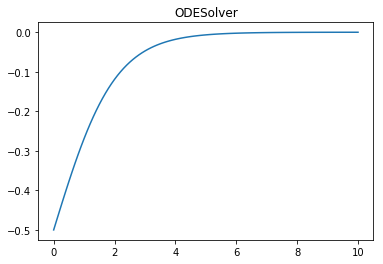

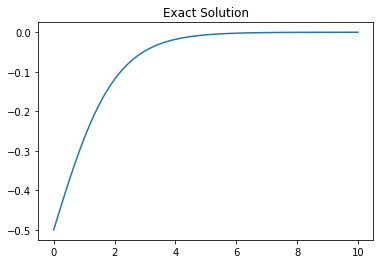

Error: 6.8784122042864215e-06


In [48]:
a = [[0, 0, 0],
     [1/2, 0, 0],
     [-1, 2, 0]]
b = [1/6, 2/3, 1/6]
c = [0, 1/2, 1]

f = lambda x, u: np.exp(x) * (u ** 2)
u0 = -1/2
u = lambda x: -1/(np.exp(x) + 1)
bounds = (0,10)

# (a, b, c, f, u0, u, bounds, h)
solver = ODESolver(a, b, c, f, u_0, u, bounds, 0.1)
solver.solve()

plt.figure()
plt.plot(solver.x, solver.u_n)
plt.title('ODESolver')
plt.show()

plt.figure()
x = np.linspace(0,10,100)
plt.plot(x, u(x))
plt.title('Exact Solution')
plt.show()

print('Error: {}'.format(solver.error()))

In [49]:
nested_nets = []
errors = []
h = 1
for i in range(10):
    solver = ODESolver(a, b, c, f, u0, u, bounds, h)
    solver.solve()
    errors.append(solver.error())
    nested_nets.append(h)
    print(solver.error(), h)
    h /= 2

0.0207978025826 1
0.00140185011591 0.5
0.000128694585331 0.25
1.38366330225e-05 0.125
1.60718075e-06 0.0625
1.93820752503e-07 0.03125
2.37999073366e-08 0.015625
2.94880393714e-09 0.0078125
3.66976740662e-10 0.00390625
4.57709564694e-11 0.001953125


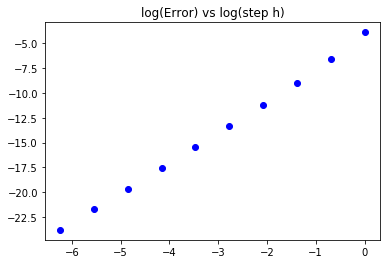

In [50]:
plt.figure()
plt.plot(np.log(nested_nets), np.log(errors), 'bo')
plt.title('log(Error) vs log(step h)')
plt.show()

In [52]:
print(u"Получившийся порядок аппроксимации", np.polyfit(np.log(nested_nets), np.log(errors), 1)[0])

Получившийся порядок аппроксимации 3.14884336558
